In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
style.use('fivethirtyeight')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler




df= pd.read_excel("D:/Dataset/Wisconsin_breast_cancer.xlsx")

df['diagnosis'] = np.where(df.diagnosis == 'M', 1, 0)
# y = df.diagnosis                          # M or B 
list = ['id']
df= df.drop(list,axis = 1 )
# # X.rename(columns={x:y for x,y in zip(X.columns,range(0,len(X.columns)))})

df.columns = np.arange(len(df.columns))
# X.columns
df.head()
y, X = df.iloc[:, 0].values, df.iloc[:, 1:].values

X_cent = X - X.mean(axis=0)
X_std = X_cent / X.std(axis=0)




In [34]:
import numpy as np

def comp_mean_vectors(X, y):
    class_labels = np.unique(y)
    n_classes = class_labels.shape[0]
    mean_vectors = []
    for cl in class_labels:
        mean_vectors.append(np.mean(X[y==cl], axis=0))
    return mean_vectors

def scatter_within(X, y):
    class_labels = np.unique(y)
    n_classes = class_labels.shape[0]
    n_features = X.shape[1]
    mean_vectors = comp_mean_vectors(X, y)
    S_W = np.zeros((n_features, n_features))
    for cl, mv in zip(class_labels, mean_vectors):
        class_sc_mat = np.zeros((n_features, n_features))                 
        for row in X[y == cl]:
            row, mv = row.reshape(n_features, 1), mv.reshape(n_features, 1)
            class_sc_mat += (row-mv).dot((row-mv).T)
        S_W += class_sc_mat                           
    return S_W

def scatter_between(X, y):
    overall_mean = np.mean(X, axis=0)
    n_features = X.shape[1]
    mean_vectors = comp_mean_vectors(X, y)    
    S_B = np.zeros((n_features, n_features))
    for i, mean_vec in enumerate(mean_vectors):  
        n = X[y==i+1,:].shape[0]
        mean_vec = mean_vec.reshape(n_features, 1)
        overall_mean = overall_mean.reshape(n_features, 1)
        S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
    return S_B

def get_components(eig_vals, eig_vecs, n_comp=2):
    n_features = X.shape[1]
    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
    eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)
    W = np.hstack([eig_pairs[i][1].reshape(30, 1) for i in range(0, n_comp)])
    return W

In [50]:
S_W, S_B = scatter_within(X, y), scatter_between(X, y)
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
W = get_components(eig_vals, eig_vecs, n_comp=3)
print('EigVals: %s\n\nEigVecs: %s' % (eig_vals, eig_vecs))
print('\nW: %s' % W)
# W.shape

(30, 3)

C:\Users\mkahs\Anaconda3\lib\site-packages\numpy\core\numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


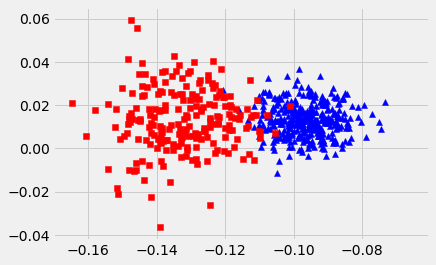

In [36]:
X_lda = X.dot(W)
for label,marker,color in zip(
        np.unique(y),('^', 's', 'o'),('blue', 'red', 'green')):
    plt.scatter(X_lda[y==label, 0], X_lda[y==label, 1],
                color=color, marker=marker)

In [ ]:
/Users/sebastian/miniconda3/lib/python3.5/site-packages/numpy/core/numeric.py:525: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)

In [95]:
S_W, S_B = scatter_within(X_std, y), scatter_between(X_std, y)
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
#W_std = get_components(eig_vals, eig_vecs, n_comp=3)
# W_std.shape
# print('EigVals: %s\n\nEigVecs: %s' % (eig_vals, eig_vecs))
# print('\nW: %s' % W_std)
print(eig_vals)
#sorted_eig=eig_vals.sort()
sorted1=eig_vals.argsort()[::-1]  
print(sorted1)
A=np.zeros((30,3))
for i in range(0,30):
    for j in range(0,3):
        A[i][j]=eig_vecs[sorted1[i]][j]
print(A)
B=np.matmul(X, A)
print(B)
B.shape

[ 7.59154562e-01+0.00000000e+00j -4.74304511e-14+6.64024302e-14j
 -4.74304511e-14-6.64024302e-14j  1.51747770e-14+0.00000000e+00j
 -1.39701844e-14+4.62811738e-15j -1.39701844e-14-4.62811738e-15j
  6.47926677e-15+4.42318756e-15j  6.47926677e-15-4.42318756e-15j
  3.61368593e-15+6.60283506e-15j  3.61368593e-15-6.60283506e-15j
 -7.02159006e-15+0.00000000e+00j  1.78918406e-15+6.61082811e-16j
  1.78918406e-15-6.61082811e-16j  1.57047690e-15+0.00000000e+00j
 -1.32490541e-15+2.49616439e-16j -1.32490541e-15-2.49616439e-16j
 -5.64341936e-16+8.13382466e-16j -5.64341936e-16-8.13382466e-16j
  5.63965711e-16+2.29603050e-16j  5.63965711e-16-2.29603050e-16j
 -2.74373218e-16+3.86628297e-16j -2.74373218e-16-3.86628297e-16j
 -4.36902736e-16+0.00000000e+00j -5.45344058e-17+1.38462493e-16j
 -5.45344058e-17-1.38462493e-16j  7.89000789e-17+8.21780765e-18j
  7.89000789e-17-8.21780765e-18j  1.53240392e-17+0.00000000e+00j
 -7.29482659e-19+0.00000000e+00j -1.02124259e-17+0.00000000e+00j]
[ 0  3  6  7  8  9 11 12

C:\Users\mkahs\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: ComplexWarning: Casting complex values to real discards the imaginary part


(569, 3)

C:\Users\mkahs\Anaconda3\lib\site-packages\numpy\core\numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


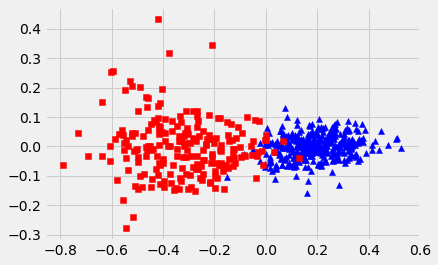

In [68]:
X_std_lda = X_std.dot(W_std)
X_std_lda[:, 1] = X_std_lda[:, 1]
for label,marker,color in zip(
        np.unique(y),('^', 's', 'o'),('blue', 'red', 'green')):
    plt.scatter(X_std_lda[y==label, 0], X_std_lda[y==label, 1],
                color=color, marker=marker)